# MULTIGRIS ISM applications
## Estimate or use dust extinction (BOND context)

<font color=red>For best performance, it is advised to execute MULTIGRIS in the shell, as explained in the README. This notebook is just a way to illustrate a workflow. </font>

***
This notebook presents some examples of ISM applications with MULTIGRIS. <font color=red>Make sure to check the general notebooks on how to run the programs beforehand!</font>

We'll also take the occasion to use various plots and inference options. 

The applications will use the following Cloudy grid (Ferland et al. [2017](https://ui.adsabs.harvard.edu/abs/2017RMxAA..53..385F/abstract)):
- BOND (http://bond.ufsc.br/; https://sites.google.com/site/mexicanmillionmodels/)

The various notebooks use some specific terms described in the file TERMS.org. 
***

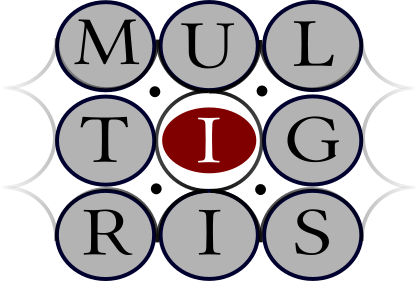

In [1]:
%load_ext autoreload
%autoreload 2
from wand.image import Image as WImage #this is to view PDFs
from IPython.display import Image
Image(filename='../Images/logo.png')

## Table of contents:
* [Estimate or use E(B-V)](#app4)
* [Use a different E(B-V) for each sector](#app5)

## Imports and settings
***

In [2]:
import os

import sys
sys.path.append('../') 

#arviz to read the PyMC3 trace
import arviz as az

import numpy as np
import matplotlib.pyplot as plt

#imports to make input files
import importlib
import Library.lib_input
importlib.reload(Library.lib_input)
from Library.lib_input import *

#import the main MULTIGRIS scripts
import mgris_search, mgris_process, mgris_post_process, mgris_compare

#may need to run this if the script is interrupted
from Library.lib_main import closelogfiles

# global parameters
from rcparams import rcParams

#to read the grid
import pandas as pd

#this is the input filename we'll use throughout, it will be automatically copied in the output directories each run
os.makedirs('./Runs/ISM_applications', exist_ok=True)
inputfile = './Runs/ISM_applications/input.txt' 

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
if rcParams['inference_backend']=='gpu':
    import jax
    jax.clear_caches()

Checking path in case several copies exist

In [4]:
mgris_search.__file__

'/local/home/vleboute/work/MULTIGRIS/mgris/mgris_search.py'

## Estimate or use E(B-V) <a class="anchor" id="app4"></a>
***

For this test we will use observed emission-line fluxes without any correction for extinction and use E(B-V) as an additional random variable (i.e., to redden the model). This is possible through the context-specific library. This makes it possible to consider the extinction correction in a consistent way with the other parameters. 

We will use the observation of J0811+4730 in Izotov et al. ([2018](https://ui.adsabs.harvard.edu/abs/2018MNRAS.473.1956I/abstract))

In [5]:
params = get_params()
params['context'].value = 'Contexts/BOND'
output_directory = './Runs/ISM_applications/EBV/'
params['output'].value = output_directory
params['USE configuration'].value = '1C1S_shell'
params['select'].value = ['hbfrac [1,1]'] #we select all radiation-bounded models
#we don't use the blend 3968.00 [Ne III] + H7
params['BEGIN observations'].value = '''#H11215.67A
#He21640.43A
#Blnd1666.00A
#C31908.73A
#Mg22795.53A
#Mg22802.71A
Blnd3727.00A 14.70 0.33
Ne33868.76A 11.91 0.28
#Ne33967.47A 18.05 0.34
H14340.46A 44.14 0.69
Blnd4363.00A 5.93 0.19
He14471.49A 3.51 0.15
H14861.33A 100 0.4
O34958.91A 56.75 0.88
O35006.84A 165.79 2.46
He15875.64A 10.38 0.18
O16300.30A 0.65 0.06
S36312.06A 0.46 0.06
H16562.81A 311.93 4.56
N26583.45A 0.72 0.06
He16678.15A 2.97 0.08
S26716.44A 1.39 0.06
S26730.82A 1.23 0.06
S39068.62A 2.14 0.18'''
params['BEGIN observations'].extras = {'scale': 'linear', 
                                       'scale_factor': 2.1e40/100} #we don't need to use scale_factor unless we care about extensive secondary parameters such as masses, but let's do it for illustration: the grid line fluxes are in log [erg s-1]; here L(Hbeta)=2.1e40 and Hbeta in the observation block is 100 
params['use_scaling'].value = "'all'"
params['active_rules'].value = ['extinction']
make_input(params, inputfile)

In [6]:
if rcParams['inference_backend']=='gpu':
    nsamples_per_job = 150
else:
    nsamples_per_job = 200
    
closelogfiles() #in case run was interrupted
mgris_search.main(args=mgris_search.args(inputfile=inputfile, order=0, nsamples_per_job=nsamples_per_job))







       ┍ M U L ┑
       ┝ T I G ┥
       ┕ R I S ┙






     ┍           ┑
     ┝ INFERENCE ┥
     ┕           ┙






Thanks for using MULTIGRIS.
Please make sure to check the README file, the notebooks, and the publication (https://ui.adsabs.harvard.edu/abs/2022A%26A...667A..34L/abstract).







▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
▓ READING INPUT PARAMETERS ▓
▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓


-- Using pre-defined configuration 1C1S_shell

    ┍========================================┑
    ┝========= MULTIGRIS summary ============┥
    ┝========================================┙
    ┝ git version & date:
    ┝ - 1a38371 (2024-09-06 08:20:37 +0200)
    ┝ - 1a38371
    ┝ git submodules:
    ┝ - 'Contexts/mgris_bond': 474a7c3, 'Contexts/mgris_loc': 78805da, 'Contexts/mgris_sfgx': dcd6f15 
    ┝========================================
    ┝ PyMC version  : 5.16.2
    ┝ Tensor library: pytensor
    ┝ - Compile directory:
    ┝   - /tmp/pytensor.NOBACKUP
    ┝ - Precision: float32
    ┕=======

[17 13  6  9 15]
-> [17  1  6  9 15]
[17  1  6  9 15]


NO 0: single value (nearest neighbor grid interpolation)


-> [17  1  1  9 15]
[17  1  1  9 15]


Zsun 0: single value (nearest neighbor grid interpolation)


-> [17  1  1  1 15]
[17  1  1  1 15]
-> [17  1  1  1  1]



Calculating prior predictive sample...
--------------------------------------
Sampling: [ebv, idx_NO_0, idx_U_0, idx_Zsun_0, idx_age_0, scale]
Sampling: [ebv, idx_NO_0, idx_U_0, idx_Zsun_0, idx_age_0, scale]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
                  mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
ebv              0.789  0.621   0.003    1.877      0.026    0.019     552.0   
idx_NO_0         4.028  2.143   0.088    7.456      0.100    0.073     468.0   
idx_U_0          5.917  3.165   0.924   11.381      0.146    0.103     474.0   
idx_Zsun_0       7.098  3.793   0.573   13.347      0.166    0.119     506.0   
idx_age_0        2.507  1.343   0.226    4.726      0.058    0.043     537.0   
log_likelihood    -inf    NaN    -inf -661.437        NaN      NaN     475.0   
log_likelihood0   -inf    NaN    -inf -661.437        NaN      NaN     475.0   
mask             0.608  0.489   0.000    1.000    


✨
✨✨
✨✨✨✨✨
✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨
✨✨✨✨✨
✨✨
✨
✨✨
✨✨✨✨
✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨ INFERENCE END
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨
✨✨✨✨
✨✨
✨
Inference ended     : 2024-09-06 18:16:59.381290
Time used           : 1.2 min.
Sampling time used  :  0.46 min.
Garbage collection thresholds : (700, 10, 10)
Garbage collector: collected 832659 objects.

▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
▓ RESULTS AND VERIFICATIONS ▓
▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓


                            mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
ebv                        0.098  0.009    0.082    0.114      0.000    0.000   
idx_NO_0                   2.044  0.323    1.534    2.496      0.011    0.008   
idx_U_0                    6.974  0.284    6.527    7.451      0.010    0.007   
idx_Zsun_0                 2.996  0.276    2.510    3.424      0.010    0.007   
idx_age_0                  0.720  0.411  

In [7]:
closelogfiles() #in case run was interrupted
mgris_process.main(args=mgris_process.args(inputfile=inputfile))







       ┍ M U L ┑
       ┝ T I G ┥
       ┕ R I S ┙






     ┍            ┑
     ┝ PROCESSING ┥
     ┕            ┙






Thanks for using MULTIGRIS.
Please make sure to check the README file, the notebooks, and the publication (https://ui.adsabs.harvard.edu/abs/2022A%26A...667A..34L/abstract).

▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
▓ READING INFERENCE DATA ▓
▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓


-- Using pre-defined configuration 1C1S_shell







    ┍========================================┑
    ┝=========== System summary =============┥
    ┝========================================┙
    ┝ Date/time:
    ┝ - 06/09/2024 18:17:01
    ┕========================================┙
   







    ┍========================================┑
    ┝============= Run summary ==============┥
    ┝========================================┙
    ┝ - input file         : ./Runs/ISM_applications/input.txt
    ┝ - output directory   : ./Runs/ISM_applications/EBV/
    ┕========================================┙
    
Li

In [8]:
%cat $output_directory/results.txt


              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
idx_NO_0     2.043  0.334   1.529    2.496      0.016    0.011     454.0     457.0   1.00
idx_U_0      6.983  0.283   6.527    7.446      0.015    0.011     374.0     374.0   1.00
idx_Zsun_0   2.989  0.271   2.559    3.439      0.013    0.009     460.0     376.0   1.00
idx_age_0    0.727  0.410   0.124    1.443      0.020    0.014     436.0     416.0   1.00
scale       -0.437  0.013  -0.462   -0.417      0.001    0.000     338.0     347.0   1.01
w[0]         1.000  0.000   1.000    1.000      0.000    0.000     400.0     400.0    NaN
scale_eff   11.771  0.013  11.746   11.791      0.001    0.000     338.0     347.0   1.01

/!\ Values can be =0 if ~0
                      mean            sd        hdi_3%       hdi_97%     mcse_mean       mcse_sd  ess_bulk  ess_tail  r_hat
Blnd3727.00A  3.136227e+39  4.497091e+37  3.061265e+39  3.226048e+39  2.220095e+36  1.571974e+36     412.0     337.0   1.01
Ne3

Using a Milky-Way extinction curve with $R_V=3.1$ (defined in the context-specific library but this could also be a random variable), we find E(B-V):

In [9]:
trace = az.from_netcdf(output_directory+'trace_process.netCDF')
float(trace.posterior['ebv'].mean().data)

0.09864382445812225

Let's check the extinction-corrected intensities for some lines and compare to the values in Izotov et al. ([2018](https://ui.adsabs.harvard.edu/abs/2018MNRAS.473.1956I/abstract)). First let's import the dust extinction law:

In [10]:
from dust_extinction.grain_models import WD01
WD01.possnames.keys()
grain_model = WD01('MWRV31')

For the He I 3187.74A line:

In [11]:
flux, wavelength = 2.71, 3187.74e-10*1e6
Ebv = float(trace.posterior['ebv'].mean().data)
print(flux/grain_model.extinguish(1/wavelength, Ebv=Ebv)*grain_model.extinguish(1/(4861e-10*1e6), Ebv=Ebv))
print('Value in Izotov et al. (2018): ', 3.32)

3.289369674884957
Value in Izotov et al. (2018):  3.32


For the SIII 9068A line:

In [12]:
flux, wavelength = 2.14, 9068e-10*1e6
Ebv = float(trace.posterior['ebv'].mean().data)
print(flux/grain_model.extinguish(1/wavelength, Ebv=Ebv)*grain_model.extinguish(1/(4861e-10*1e6), Ebv=Ebv))
print('Value in Izotov et al. (2018): ', 1.81)

1.7589468647833517
Value in Izotov et al. (2018):  1.81


We can also convert the E(B-V) to a redenning coefficient C(Hβ) using E(B-V) ≈ 0.677 C(Hβ) (Osterbrock [1989](https://ui.adsabs.harvard.edu/abs/1989agna.book.....O/abstract), Vogel et al. [1993](https://ui.adsabs.harvard.edu/abs/1993A%26AS...98..193V/abstract)). C(Hβ) is defined as:
$\frac{I(λ)}{I(Hβ)} = \frac{I_0(λ)}{I_0(Hβ)} 10^{-C(Hβ) [f(λ)−1]}$, with $f(λ)$ extinction law normalized to Hβ

In [13]:
float(trace.posterior['ebv'].mean().data)/0.677

0.14570727394109637

To be compared to 0.165 in Izotov et al. ([2018](https://ui.adsabs.harvard.edu/abs/2018MNRAS.473.1956I/abstract))

## Use a different E(B-V) for each sector [preliminary, not fully tested]<a class="anchor" id="app5"></a>
***

For this test we will use simulated observations with 2 sectors, each having a different E(B-V) value

In [14]:
from Contexts.Library.extinction_rule import parse_cloudy_label
from dust_extinction.grain_models import WD01

First we choose the parameter set for each sector, we get the fluxes from the model grid, we redden them, and we combine them:

In [15]:
grid = pd.read_feather('../Contexts/mgris_sfgx/Grids/model_grid.fth').astype(np.float32)
params_name = ['age', 'n', 'u', 'Z', 'Lx', 'Tx', 'cut', 'lum']

#list of lines for which we wanna get the fluxes
lines = ['S26716.44A', 'S26730.82A', 'H14101.73A', 'H14340.46A', 'H14861.33A', 'H16562.81A', 'He14471.49A', 'He15875.64A', 
         'He16678.15A', 'He17065.22A', 'He24685.64A', 'N26548+84A', 'O23726+9A', 'O35007+4959A', 'Ar37135+751A', 'Fe34658.01A']

#required parameter set values, same order as params_name
models = [[0.602, 2, -2, -1.19, -2, 6, 2, 7], 
          [0.602, 3, -1, -1.19, -2, 6, 2, 7]]
#models = [[0.602, 2, -2, -1.19, -2, 6, 2, 7],]

#mixing weights
ws = [0.5, 0.5]
#ws = [1,]

#now we get the right row in the grid and get the fluxes
obsfluxes_indiv = []
for ncomp in range(len(ws)):
    tmp = pd.DataFrame(models[ncomp]).transpose().astype(np.float32)
    tmp.columns = params_name
    # tmp2 = pd.merge(tmp.astype(np.float32), grid.astype(np.float32), on=params_name, how='outer').iloc[0]
    r = np.prod([grid[p]==tmp[p].iloc[0] for p in params_name], axis=0)
    tmp2 = grid.loc[r==1].iloc[0]
    obsfluxes_indiv += [tmp2[lines].values,]

del grid
    
print('\nIndividual component fluxes:')
for i,o in enumerate(lines):
    print(lines[i], [obsfluxes_indiv[n][i] for n in range(len(ws))])
    
#now we redden them
obsfluxes = []
for i,o in enumerate(lines):
    specie, wavelength, unit = parse_cloudy_label(o)
    fac0 = WD01('MWRV31').extinguish(1./wavelength, Ebv=0.5)
    fac1 = WD01('MWRV31').extinguish(1./wavelength, Ebv=1)
    print(o, specie, wavelength, unit, fac0, fac1)
    newflux = np.log10(ws[0]*fac0*10**obsfluxes_indiv[0][i] + ws[1]*fac1*10**obsfluxes_indiv[1][i])
    obsfluxes += [newflux,]

print('\nFinal global fluxes:')
for i,o in enumerate(lines):
    print(lines[i], obsfluxes[i])


Individual component fluxes:
S26716.44A [37.511, 37.109]
S26730.82A [37.389, 37.16]
H14101.73A [38.1, 38.033]
H14340.46A [38.414, 38.339]
H14861.33A [38.729, 38.653]
H16562.81A [39.292, 39.287]
He14471.49A [37.142, 37.303]
He15875.64A [37.606, 37.857]
He16678.15A [37.005, 37.167]
He17065.22A [37.316, 37.759]
He24685.64A [37.885, 37.88]
N26548+84A [37.057728, 37.03873]
O23726+9A [37.970154, 37.3869]
O35007+4959A [39.30347, 39.433468]
Ar37135+751A [36.947414, 36.74242]
Fe34658.01A [36.255, 35.937]
S26716.44A S2 0.671644 um 0.34115719225000946 0.11638822982390992
S26730.82A S2 0.673082 um 0.34228920534251844 0.11716190009401274
H14101.73A H1 0.41017299999999995 um 0.1277268421666023 0.016314146209852134
H14340.46A H1 0.43404600000000004 um 0.14521968594403492 0.02108875718568413
H14861.33A H1 0.48613300000000004 um 0.18648666213853757 0.034777275155573065
H16562.81A H1 0.6562810000000001 um 0.32886507133623016 0.10815223514498376
He14471.49A He1 0.447149 um 0.15520849219115726 0.02408967

Then we make the input file and activate the extinction rule allowing different values for each sector

In [16]:
params = get_params()
params['context'].value = 'Contexts/mgris_sfgx'
output_directory = './Runs/ISM_applications/EBV_persector/'
params['output'].value = output_directory
params['USE configuration'].value = '1C2S'
params['select'].value = ['cut [2,2]', 'lum [7,7]', 'Z_dust [0,0]'] 
params['BEGIN observations'].value = '''{}'''.format('\n'.join([lines[i]+' '+str(o) for i,o in enumerate(obsfluxes)]))
params['BEGIN observations'].extras = {'delta_ref': 0.2, 'scale': 'log'}
params['use_scaling'].value = "'all'"
params['active_rules'].value = ['extinction_persector']
make_input(params, inputfile)

In [17]:
if rcParams['inference_backend']=='gpu':
    nsamples_per_job = 150
else:
    nsamples_per_job = 200
    
closelogfiles() #in case run was interrupted
mgris_search.main(args=mgris_search.args(inputfile=inputfile, order=0, nsamples_per_job=nsamples_per_job))







       ┍ M U L ┑
       ┝ T I G ┥
       ┕ R I S ┙






     ┍           ┑
     ┝ INFERENCE ┥
     ┕           ┙






Thanks for using MULTIGRIS.
Please make sure to check the README file, the notebooks, and the publication (https://ui.adsabs.harvard.edu/abs/2022A%26A...667A..34L/abstract).







▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
▓ READING INPUT PARAMETERS ▓
▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓


-- Using pre-defined configuration 1C2S

    ┍========================================┑
    ┝========= MULTIGRIS summary ============┥
    ┝========================================┙
    ┝ git version & date:
    ┝ - 1a38371 (2024-09-06 08:20:37 +0200)
    ┝ - 1a38371
    ┝ git submodules:
    ┝ - 'Contexts/mgris_bond': 474a7c3, 'Contexts/mgris_loc': 78805da, 'Contexts/mgris_sfgx': dcd6f15 
    ┝========================================
    ┝ PyMC version  : 5.16.2
    ┝ Tensor library: pytensor
    ┝ - Compile directory:
    ┝   - /tmp/pytensor.NOBACKUP
    ┝ - Precision: float32
    ┕=============

[16  8  5  5  8  4  4]
-> [16  1  5  5  8  4  4]
[16  1  5  5  8  4  4]
-> [16  1  1  5  8  4  4]


Z 0: single value (nearest neighbor grid interpolation)


[16  1  1  5  8  4  4]
-> [16  1  1  1  8  4  4]
[16  1  1  1  8  4  4]


Lx 0: single value (nearest neighbor grid interpolation)


-> [16  1  1  1  1  4  4]
[16  1  1  1  1  4  4]


Tx 0: single value (nearest neighbor grid interpolation)


-> [16  1  1  1  1  1  4]
[16  1  1  1  1  1  4]


age 1: single value (nearest neighbor grid interpolation)
n 1: single value (nearest neighbor grid interpolation)
u 1: single value (nearest neighbor grid interpolation)


-> [16  1  1  1  1  1  1]
[16  8  5  5  8  4  4]
-> [16  1  5  5  8  4  4]
[16  1  5  5  8  4  4]
-> [16  1  1  5  8  4  4]


Z 1: single value (nearest neighbor grid interpolation)


[16  1  1  5  8  4  4]
-> [16  1  1  1  8  4  4]


Lx 1: single value (nearest neighbor grid interpolation)


[16  1  1  1  8  4  4]
-> [16  1  1  1  1  4  4]
[16  1  1  1  1  4  4]


Tx 1: single value (nearest neighbor grid interpolation)


-> [16  1  1  1  1  1  4]
[16  1  1  1  1  1  4]
-> [16  1  1  1  1  1  1]



Calculating prior predictive sample...
--------------------------------------
Sampling: [ebv, idx_Lx_0, idx_Tx_0, idx_Z_0, idx_age_0, idx_n_0, idx_n_1, idx_u_0, idx_u_1, scale, w]
Sampling: [ebv, idx_Lx_0, idx_Tx_0, idx_Z_0, idx_age_0, idx_n_0, idx_n_1, idx_u_0, idx_u_1, scale, w]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
                  mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
ebv[0]           0.834  0.637   0.002    1.984      0.030    0.021     460.0   
ebv[1]           0.790  0.603   0.004    1.904      0.029    0.020     417.0   
idx_Lx_0         1.502  0.797   0.274    2.987      0.036    0.026     481.0   
idx_Lx_1         1.502  0.797   0.274    2.987      0.036    0.026     481.0   
idx_Tx_0         1.451  0.809   0.005    2.744      0.038    0.027     453.0   
idx_Tx_1         1.451  0.809   0.005    2.744      0.038    0.027     453.0   
idx_Z_0          3.579  1.856   0.651    6.888      0.08

The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details

✨
✨✨
✨✨✨✨✨
✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨
✨✨✨✨✨
✨✨
✨
✨✨
✨✨✨✨
✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨ INFERENCE END
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨
✨✨✨✨
✨✨
✨
Inference ended     : 2024-09-06 18:18:45.225566
Time used           : 1.2 min.
Sampling time used  :  0.63 min.
Garbage collection thresholds : (700, 10, 10)
Garbage collector: collected 1278321 objects.

▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
▓ RESULTS AND VERIFICATIONS ▓
▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓


                          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
ebv[0]                   0.718  0.411   0.091    1.459      0.018    0.013   
ebv[1]                   0.698  0.432   0.110    1.513      0.021    0.015   
idx_Lx_0                 2.036  0.312   1.505    2.496      0

In [18]:
closelogfiles() #in case run was interrupted
mgris_process.main(args=mgris_process.args(inputfile=inputfile))







       ┍ M U L ┑
       ┝ T I G ┥
       ┕ R I S ┙






     ┍            ┑
     ┝ PROCESSING ┥
     ┕            ┙






Thanks for using MULTIGRIS.
Please make sure to check the README file, the notebooks, and the publication (https://ui.adsabs.harvard.edu/abs/2022A%26A...667A..34L/abstract).

▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
▓ READING INFERENCE DATA ▓
▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓


-- Using pre-defined configuration 1C2S







    ┍========================================┑
    ┝=========== System summary =============┥
    ┝========================================┙
    ┝ Date/time:
    ┝ - 06/09/2024 18:18:48
    ┕========================================┙
   







    ┍========================================┑
    ┝============= Run summary ==============┥
    ┝========================================┙
    ┝ - input file         : ./Runs/ISM_applications/input.txt
    ┝ - output directory   : ./Runs/ISM_applications/EBV_persector/
    ┕========================================┙
   

In [19]:
%cat $output_directory/results.txt


            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
idx_Lx_0   2.014  0.301   1.530    2.475      0.017    0.012     277.0     351.0   1.01
idx_Lx_1   2.014  0.301   1.530    2.475      0.017    0.012     277.0     351.0   1.01
idx_Tx_0   1.985  0.263   1.526    2.412      0.014    0.010     366.0     257.0   1.01
idx_Tx_1   1.985  0.263   1.526    2.412      0.014    0.010     366.0     257.0   1.01
idx_Z_0    2.002  0.329   1.541    2.469      0.017    0.012     356.0     374.0   1.02
idx_Z_1    2.002  0.329   1.541    2.469      0.017    0.012     356.0     374.0   1.02
idx_age_0  3.292  1.665   0.375    5.963      0.084    0.060     388.0     337.0   1.02
idx_age_1  3.292  1.665   0.375    5.963      0.084    0.060     388.0     337.0   1.02
idx_n_0    2.401  0.554   1.541    3.389      0.027    0.019     441.0     364.0   1.01
idx_n_1    2.256  0.741   1.044    3.669      0.039    0.027     357.0     395.0   1.00
idx_u_0    2.664  0.664   1.505